# Few data points 

# OLS

In [14]:
import numpy as np

theta_true = (1, 5, 50) #(b,m,sigma_true)
ndata =  10
xdata = 100 * np.random.random(ndata)
xdata.sort()
y_true = theta_true[0] + theta_true[1]*xdata
ydata = np.random.normal(y_true, theta_true[2])

X = np.ones_like(xdata)
X = np.vstack([X, xdata]).T
theta_hat = np.linalg.solve(np.dot(X.T,X),np.dot(X.T,ydata))
y_hat = np.dot(X,theta_hat)
sigma_hat = np.std(ydata - y_hat)
print('slope: {}\nintercept: {}\nsigma= {}'.format(theta_hat[0],theta_true[1], sigma_hat))

slope: 15.646829826767599
intercept: 5
sigma= 38.684078171822456


Populating the interactive namespace from numpy and matplotlib


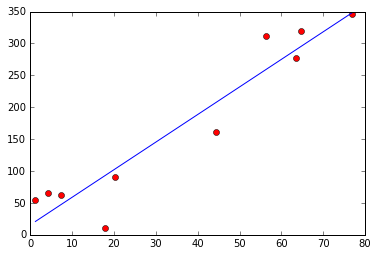

In [15]:
from matplotlib import pyplot as plt
%pylab inline

plt.plot(xdata,ydata, 'ro');
plt.plot(xdata, theta_hat[0]+theta_hat[1]*xdata);

-$\frac{1}{2} \Sigma(\log(2 \pi \sigma^2) + \frac{y-y_{model}^2} {\sigma^2}$

# WLS

In [16]:
def log_like(theta, x, y):      #theta is a tuple
    alpha, beta, sigma = theta  #unpack
    y_model = alpha + beta * x  #linear function
    return -0.5 * np.sum(np.log(2*np.pi*sigma**2) + (y-y_model)**2 / sigma**2)

def rms(y, yfit):
    return np.sqrt(np.sum((y-yfit)**2))

In [19]:
from scipy import stats
from scipy.optimize import curve_fit

# Unweighted fit
p_opt, p_cov = curve_fit(log_like, xdata, ydata, theta_true)
yfit = log_like(*p_opt)
print('Unweighted fit parameters:', p_opt)
print('Covariance matrix:'); print(p_cov)
print('rms error in fit:', rms(y_true, yfit))
print()

TypeError: log_like() takes 3 positional arguments but 4 were given

# Max. Likelihood Estimation

In [4]:
from scipy import optimize as opt

x0 = (1,1,1)                    #init guess
args = (xdata, ydata)
nll = lambda *x: -log_like(*x) #why 1 value only:? may be X here envelopes a tuple
nll(x0, xdata, ydata)          #but here nll has 3 args
optimum = opt.minimize(nll, x0, args=args, method='nelder-mead')

print(optimum.message)
theta_hat = optimum.x
y_hat = np.dot(X, theta_hat[:2]) #use 1st & 2nd elements: (b, m)
sigma_hat = theta_hat[2]
print("intercept: {}\nslope: {}\nsigma: {}".format(theta_hat[0], theta_hat[1], sigma_hat))

Optimization terminated successfully.
intercept: -56.65390684733818
slope: 6.090108548095584
sigma: 57.73976542288536


# Metropolis-Hastings

# Sampler

Unweighted fit parameters: [ 11.76822845   3.45578432   4.35303109]
Covariance matrix:
[[ 0.05129973 -0.00062891  0.00276417]
 [-0.00062891  0.03316552 -0.04684581]
 [ 0.00276417 -0.04684581  0.12984294]]
rms error in fit: 2.91316492757

Weighted fit parameters: [ 11.96945162   3.04034573   5.02799686]
Covariance matrix:
[[ 0.01969797 -0.00326343  0.00688797]
 [-0.00326343  0.01145242 -0.02152861]
 [ 0.00688797 -0.02152861  0.06410989]]
rms error in fit: 0.445811464723


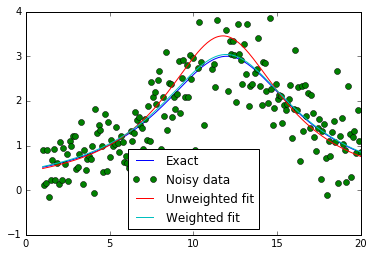

In [21]:
import numpy as np
from scipy.optimize import curve_fit
import pylab

x0, A, gamma = 12, 3, 5

n = 200
x = np.linspace(1, 20, n)
yexact = A * gamma**2 / (gamma**2 + (x-x0)**2)

# Add some noise with a sigma of 0.5 apart from a particularly noisy region
# near x0 where sigma is 3
sigma = np.ones(n)*0.5
sigma[np.abs(x-x0+1)<1] = 3
noise = np.random.randn(n) * sigma
y = yexact + noise

def f(x, x0, A, gamma):
    """ The Lorentzian entered at x0 with amplitude A and HWHM gamma. """
    return A *gamma**2 / (gamma**2 + (x-x0)**2)

def rms(y, yfit):
    return np.sqrt(np.sum((y-yfit)**2))

# Unweighted fit
p0 = 10, 4, 2
popt, pcov = curve_fit(f, x, y, p0)
yfit = f(x, *popt)
print('Unweighted fit parameters:', popt)
print('Covariance matrix:'); print(pcov)
print('rms error in fit:', rms(yexact, yfit))
print()

# Weighted fit
popt2, pcov2 = curve_fit(f, x, y, p0, sigma=sigma, absolute_sigma=True)
yfit2 = f(x, *popt2)
print('Weighted fit parameters:', popt2)
print('Covariance matrix:'); print(pcov2)
print('rms error in fit:', rms(yexact, yfit2))

pylab.plot(x, yexact, label='Exact')
pylab.plot(x, y, 'o', label='Noisy data')
pylab.plot(x, yfit, label='Unweighted fit')
pylab.plot(x, yfit2, label='Weighted fit')
pylab.ylim(-1,4)
pylab.legend(loc='lower center')
pylab.show()